<a href="https://colab.research.google.com/github/AryaJeet1364/PyTorch_Projects/blob/main/MNISTDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Digit Classification


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# Basic normalization for MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # MNIST is grayscale, so just one channel
])

In [3]:
# Loading MNIST train and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)


In [4]:
# Setting up data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [5]:
# Simple 3-layer MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

In [7]:
criterion = nn.CrossEntropyLoss() # Using CrossEntropyLoss because it works well with classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Training Loop
def train(model, loader):
    model.train()
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(loader)

In [9]:
# Evaluation Loop
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [10]:
epochs = 5
for epoch in range(epochs):
    train_loss = train(model, train_loader)
    train_acc = evaluate(model, train_loader)
    test_acc = evaluate(model, test_loader)

    print(f"Epoch {epoch+1}:")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Train Acc : {train_acc * 100:.2f}%")
    print(f"  Test Acc  : {test_acc * 100:.2f}%\n")

Epoch 1:
  Train Loss: 0.4063
  Train Acc : 93.22%
  Test Acc  : 93.02%

Epoch 2:
  Train Loss: 0.1919
  Train Acc : 95.73%
  Test Acc  : 95.50%

Epoch 3:
  Train Loss: 0.1407
  Train Acc : 96.26%
  Test Acc  : 95.78%

Epoch 4:
  Train Loss: 0.1142
  Train Acc : 97.15%
  Test Acc  : 96.46%

Epoch 5:
  Train Loss: 0.0979
  Train Acc : 97.31%
  Test Acc  : 96.66%



In [11]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

def predict_random_sample(model, dataset):
    model.eval()
    index = random.randint(0, len(dataset) - 1)
    image, label = dataset[index]

    with torch.no_grad():
        img_tensor = image.unsqueeze(0).to(device)
        output = model(img_tensor)
        _, pred = torch.max(output, 1)

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Actual: {label}, Predicted: {pred.item()}")
    plt.axis('off')
    plt.show()

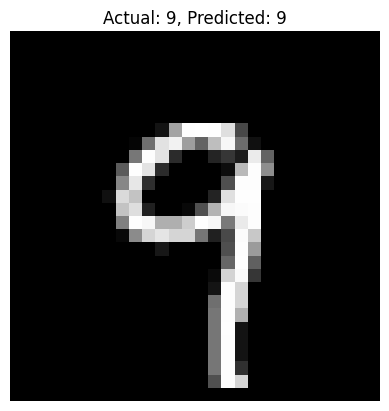

In [12]:
predict_random_sample(model, test_dataset)